In [4]:
import pandas as pd
import numpy as np
from module.TOPSIS import TOPSIS

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [23]:
list_values = [["Insuficiênte entrega de fricção sobre as rodas",5,2,3],
               ["Falha do sistema de ABS",8,1,8],
               ["Vazamento Fluido de Freio",9,2,5]]

df_top = pd.DataFrame(list_values,columns=['alternative','s','o','p'])

matrix = np.array(df_top[['s','o','p']])

Alternatives = df_top.alternative.values

w = np.array([0.4, 0.3, 0.3])

# 1 - Minimaze 0 - Maximaze
cb = np.array([0, 0, 0])

B = TOPSIS (matrix, w, cb)
B.normalizeMatrix()
B.introWeights()
B.getIdealSolutions()
B.distanceToIdeal()
B.relativeCloseness()

result = list(zip(Alternatives,B.rCloseness))
df_result = pd.DataFrame(result,columns=['alternative','rank'])

df_full = pd.merge(df_top,df_result, left_on='alternative', right_on='alternative', how='left')
df_full = df_full.rename(columns={'rank':'rank_topsis'})

df_show = df_full.sort_values(by=['rank_topsis'],ascending=False).reset_index().drop('index',axis=1)

In [25]:
df_show

,alternative,s,o,p,rank_topsis
0,Vazamento Fluido de Freio,9,2,5,0.650895
1,Falha do sistema de ABS,8,1,8,0.628926
2,Insuficiênte entrega de fricção sobre as rodas,5,2,3,0.339004


# Graph

In [26]:
df_result = df_result.sort_values(by=['rank'],ascending=True).reset_index().drop('index',axis=1)

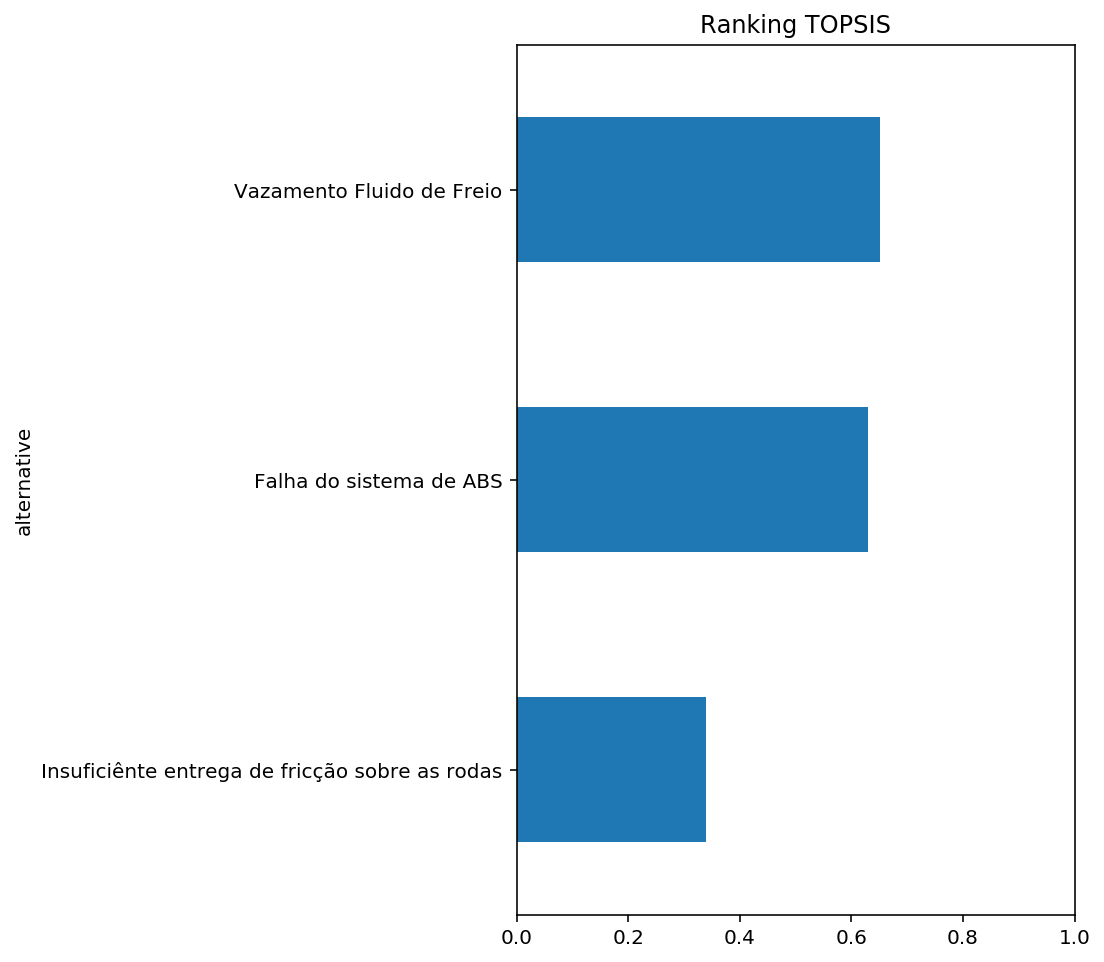

In [27]:
%config InlineBackend.figure_format = 'retina'
df_result.plot(x='alternative', y='rank', kind='barh',figsize=(5,8),xlim=(0,1),title='Ranking TOPSIS',legend=False)